In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
from sklearn import linear_model

In [4]:
#df = pd.read_csv("Dataset/new_college2.csv") ## avg
df = pd.read_csv("Dataset/new_college3.csv") ## max

In [5]:
mask = np.sum(df[['LAT','SR','TQS','SVL','MVL','MBP']].isnull().values, axis=1) < 6

In [6]:
df_physical = df[mask]

#### Fill missing values with mean

In [7]:
df_cleaned = df.fillna(np.mean(df, axis=0))

In [8]:
df_physical_cleaned = df_physical.fillna(np.mean(df_physical, axis=0))

In [9]:
df_cleaned.shape

(2001, 26)

In [10]:
df_physical_cleaned.shape

(543, 26)

In [11]:
df_cleaned.columns

Index(['Name', 'G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK',
       'TOV', 'PF', 'MP.1', 'PTS.1', 'FG%', '3P%', 'FT%', 'Years', 'AP', 'LAT',
       'SR', 'TQS', 'SVL', 'MVL', 'MBP', 'VORP_Max'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

#### Drop Physical Attributes

In [14]:
df_cleaned.columns

Index(['Name', 'G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK',
       'TOV', 'PF', 'MP.1', 'PTS.1', 'FG%', '3P%', 'FT%', 'Years', 'AP', 'LAT',
       'SR', 'TQS', 'SVL', 'MVL', 'MBP', 'VORP_Max'],
      dtype='object')

In [15]:
df_cleaned = df_cleaned[['Name', 'G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK',
       'TOV', 'PF', 'MP.1', 'PTS.1', 'FG%', '3P%', 'FT%', 'Years', 'AP', 'VORP_Max']]

#### one-hot encode year

In [134]:
df_cleaned["Y1"]=0.0
df_cleaned["Y2"]=0.0
df_cleaned["Y3"]=0.0
df_cleaned["Y4"]=0.0

In [135]:
df_cleaned.Y1[df_cleaned["Years"]==1.0]=1.0
df_cleaned.Y2[df_cleaned["Years"]==2.0]=1.0
df_cleaned.Y3[df_cleaned["Years"]==3.0]=1.0
df_cleaned.Y4[df_cleaned["Years"]==4.0]=1.0

/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/farahshih/anacon

In [144]:
df_physical_cleaned["Y1"]=0.0
df_physical_cleaned["Y2"]=0.0
df_physical_cleaned["Y3"]=0.0
df_physical_cleaned["Y4"]=0.0

In [145]:
df_physical_cleaned.Y1[df_physical_cleaned["Years"]==1.0]=1.0
df_physical_cleaned.Y2[df_physical_cleaned["Years"]==2.0]=1.0
df_physical_cleaned.Y3[df_physical_cleaned["Years"]==3.0]=1.0
df_physical_cleaned.Y4[df_physical_cleaned["Years"]==4.0]=1.0

/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/farahshih/anacon

In [136]:
df_cleaned.head()

,Name,G,FGA,3PA,FTA,ORB,TRB.1,AST.1,STL,BLK,...,FT%,Years,AP,VORP_Max,Y1,Y2,Y3,Y4,Superstar,Superstar2
0,abdelal01,33.500000,5.375016,2.398469,2.340140,1.64398,3.525,0.325,0.351910,0.484922,...,0.674000,4.0,0.500000,-0.2,0.0,0.0,0.0,1.0,0,0
1,abdulma02,32.000000,21.890625,7.218750,6.406250,1.64398,2.950,3.650,1.671875,0.109375,...,0.862500,2.0,0.000000,1.6,0.0,1.0,0.0,0.0,1,2
2,abdulta01,27.666667,11.285641,1.922756,4.859071,1.64398,5.800,1.400,1.020833,0.599423,...,0.678667,3.0,0.333333,0.2,0.0,0.0,1.0,0.0,1,2
3,abdursh01,28.000000,14.214286,0.750000,8.892857,1.64398,8.400,1.000,1.857143,1.250000,...,0.683000,1.0,0.000000,3.5,1.0,0.0,0.0,0.0,1,2
4,ackeral01,29.333333,11.107461,3.282642,3.524432,1.64398,5.600,2.800,1.515493,0.430174,...,0.822000,3.0,0.000000,-0.1,0.0,0.0,1.0,0.0,0,0


In [20]:
df_physical_cleaned.head()

,Name,G,FGA,3PA,FTA,ORB,TRB.1,AST.1,STL,BLK,...,SR,TQS,SVL,MVL,MBP,VORP_Max,Y1,Y2,Y3,Y4
4,ackeral01,29.333333,11.107461,3.282642,3.524432,1.688196,5.600,2.800,1.515493,0.430174,...,3.045263,3.35,28.0,32.0,11.000000,-0.1,0.0,0.0,1.0,0.0
6,acyqu01,34.750000,6.030138,0.049024,3.591711,2.405757,5.925,0.625,0.736601,1.267874,...,3.045263,3.28,32.0,37.0,13.000000,0.5,0.0,0.0,0.0,1.0
8,adamsjo01,34.500000,11.549242,4.300505,4.943182,1.248737,4.550,2.050,2.425505,0.251263,...,3.050000,3.50,24.5,29.5,10.743644,0.1,0.0,1.0,0.0,0.0
10,adamsst01,32.000000,5.468750,0.000000,2.187500,2.812500,6.300,0.600,0.656250,2.031250,...,3.020000,3.40,28.5,33.0,16.000000,2.1,1.0,0.0,0.0,0.0
12,adrieje01,33.250000,8.771180,0.045312,4.923876,1.688196,8.450,1.100,0.593088,1.146505,...,3.045263,3.32,27.5,31.5,16.000000,0.2,0.0,0.0,0.0,1.0


### Linear Regreesion Model

In [137]:
ten_fold = model_selection.KFold(n_splits=10)

In [146]:
X_1_t = df_cleaned.ix[:,['G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK', 'TOV', 'PF', 'MP.1', 
                       'PTS.1', 'FG%', '3P%', 'FT%', 'AP','Y1', 'Y2', 'Y3','Y4']]
X_p_t = df_physical_cleaned.ix[:,['G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK', 'TOV', 'PF', 'MP.1', 
                       'PTS.1', 'FG%', '3P%', 'FT%', 'AP','LAT','SR', 'TQS', 'SVL', 'MVL', 'MBP','Y1', 'Y2', 'Y3','Y4']]

X_1 = X_1_t.values[:,:-4]
X_p = X_p_t.values[:,:-4]
Y_1 = df_cleaned.VORP_Max
Y_p = df_physical_cleaned.VORP_Max
X_1_normed = StandardScaler().fit_transform(X_1) ## standardize features
X_p_normed = StandardScaler().fit_transform(X_p)
X_1_normed = np.hstack([X_1_normed,X_1_t.values[:,-4:]]) 
X_p_normed = np.hstack([X_p_normed,X_p_t.values[:,-4:]]) 
lr_model_1 = LinearRegression()

R2_1 = model_selection.cross_val_score(lr_model_1, X_1_normed, Y_1, cv=ten_fold, scoring='r2')
MSE_1 = model_selection.cross_val_score(lr_model_1, X_1_normed, Y_1, cv=ten_fold, scoring='neg_mean_squared_error')

R2_p = model_selection.cross_val_score(lr_model_1, X_p_normed, Y_p, cv=ten_fold, scoring='r2')
MSE_p = model_selection.cross_val_score(lr_model_1, X_p_normed, Y_p, cv=ten_fold, scoring='neg_mean_squared_error')

print("Mean of R Squared score of 10-fold cross validation: {0} ".format(R2_1.mean()))
print("Std of R Squared score of 10-fold cross validation: {0} ".format(R2_1.std()))
print("MSE score of 10-fold cross validation: {0} ".format(-MSE_1))

print("Mean of R Squared score of 10-fold cross validation: {0} ".format(R2_p.mean()))
print("Std of R Squared score of 10-fold cross validation: {0} ".format(R2_p.std()))
print("MSE score of 10-fold cross validation: {0} ".format(-MSE_p))

Mean of R Squared score of 10-fold cross validation: 0.17955482591025268 
Std of R Squared score of 10-fold cross validation: 0.08395687864130669 
MSE score of 10-fold cross validation: [ 2.26410313  1.39646326  1.94515484  2.01443625  2.24452558  2.22506941
  2.37351937  2.390224    1.32057179  2.1752495 ] 
Mean of R Squared score of 10-fold cross validation: 0.09803553911269629 
Std of R Squared score of 10-fold cross validation: 0.17929443091345693 
MSE score of 10-fold cross validation: [ 1.9767305   1.1508344   2.46847142  2.3010976   1.94908995  2.22340705
  2.18695247  3.17698106  1.22355723  2.61149076] 


In [139]:
lr_model= LinearRegression()
lm = lr_model.fit(X_1_normed, Y_1)

In [140]:
lm.coef_
# ['G', 'FGA', '3PA', 'FTA', 'ORB', 
# 'TRB.1', 'AST.1', 'STL', 'BLK', 'TOV', 
# 'PF', 'MP.1', 'PTS.1', 'FG%', '3P%', 
#'FT%', 'AP','Y1', 'Y2', 'Y3','Y4']

array([ 0.07769496, -0.35150476,  0.10989539, -0.06582232,  0.02967453,
        0.30559012,  0.23041391,  0.51158085,  0.26314577, -0.05366762,
       -0.01748695, -0.08188255,  0.37437546,  0.24343   ,  0.12376973,
        0.06917822,  0.1133149 ,  0.75369588,  0.64572107,  0.70546757,
        0.45116739])

In [147]:
lr_p_model= LinearRegression()
lm_p = lr_p_model.fit(X_p_normed, Y_p)
lm_p.coef_

array([  1.97628371e-03,  -1.62231832e+00,   4.15546519e-02,
        -5.43122040e-01,   1.08480323e-01,   4.25046591e-01,
         3.05985745e-01,   4.56979813e-01,   1.10865259e-01,
        -5.28389594e-02,   9.65450247e-03,  -2.83373120e-01,
         2.19909069e+00,  -7.94157056e-02,   4.55529572e-03,
        -1.49747659e-01,   2.45279439e-01,   4.47283202e-02,
         2.24939663e-04,  -1.26666089e-01,  -7.75601154e-02,
         7.28072134e-02,   3.29974528e-02,   5.11995451e-01,
        -2.38771248e-03,   1.95269884e-01,  -1.93930086e-01])

### plot histogram of features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cfbd908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f520240>]], dtype=object)

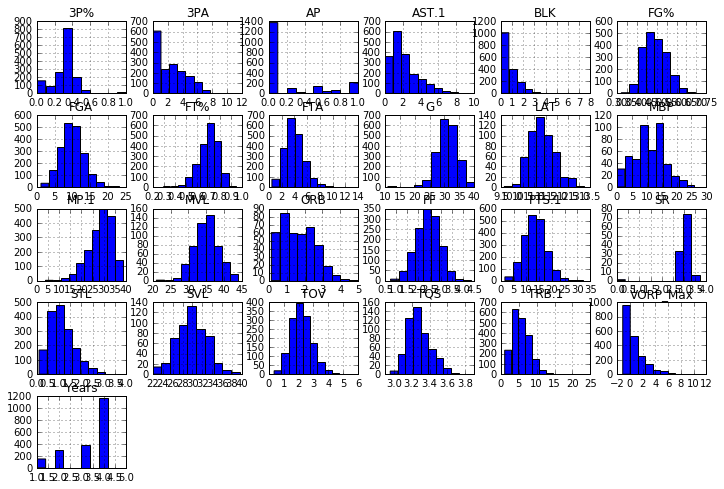

In [141]:
df.hist(figsize=(12,8), layout=(5,6))

## Binary Classification

In [148]:
df_cleaned["Superstar"]="0"
df_cleaned.Superstar[df_cleaned["VORP_Max"]>=0.2]="1"

/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [149]:
df_physical_cleaned["Superstar"]="0"
df_physical_cleaned.Superstar[df_cleaned["VORP_Max"]>=0.2]="1"

/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [150]:
Y_2 = df_cleaned.Superstar

In [151]:
sum(Y_2=="1")

932

In [152]:
Y_p = df_physical_cleaned.Superstar

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_1_normed, Y_2)

In [154]:
X_p_train, X_p_test, Y_p_train, Y_p_test = train_test_split(X_p_normed, Y_p)

In [155]:
logreg = linear_model.LogisticRegression(class_weight='balanced')
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [156]:
logreg_p = linear_model.LogisticRegression(class_weight='balanced')
logreg_p.fit(X_p_train, Y_p_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [157]:
Y_test_pred = logreg.predict(X_test)
Y_train_pred = logreg.predict(X_train)

In [158]:
Y_p_test_pred = logreg_p.predict(X_p_test)
Y_p_train_pred = logreg_p.predict(X_p_train)

In [159]:
from sklearn import metrics

In [160]:
print(metrics.confusion_matrix(Y_train, Y_train_pred))
print(metrics.confusion_matrix(Y_test, Y_test_pred))

[[526 272]
 [249 453]]
[[176  95]
 [ 88 142]]


In [162]:
print("precision:", 142/(95+142))
print("recall:", 142/(88+142))

precision: 0.5991561181434599
recall: 0.6173913043478261


In [164]:
print(metrics.confusion_matrix(Y_p_train, Y_p_train_pred))
print(metrics.confusion_matrix(Y_p_test, Y_p_test_pred))

[[140  62]
 [ 59 146]]
[[41 36]
 [25 34]]


In [168]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, max_features=3)

In [169]:
rf_p = RandomForestClassifier(n_estimators = 20, max_features=3)

In [170]:
rf.fit(X_train, Y_train)
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)
print(metrics.confusion_matrix(Y_train, Y_train_pred))
print(metrics.confusion_matrix(Y_test, Y_test_pred))
print(metrics.accuracy_score(Y_train, Y_train_pred))
print(metrics.accuracy_score(Y_test, Y_test_pred))

[[798   0]
 [  4 698]]
[[202  69]
 [109 121]]
0.997333333333
0.644710578842


In [171]:
print("precision:", 121/(69+121))
print("recall:", 121/(109+121))

precision: 0.6368421052631579
recall: 0.5260869565217391


In [172]:
rf_p.fit(X_p_train, Y_p_train)
Y_p_train_pred = rf_p.predict(X_p_train)
Y_p_test_pred = rf_p.predict(X_p_test)
print(metrics.confusion_matrix(Y_p_train, Y_p_train_pred))
print(metrics.confusion_matrix(Y_p_test, Y_p_test_pred))
print(metrics.accuracy_score(Y_p_train, Y_p_train_pred))
print(metrics.accuracy_score(Y_p_test, Y_p_test_pred))

[[202   0]
 [  1 204]]
[[51 26]
 [27 32]]
0.997542997543
0.610294117647


In [173]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=80, max_features=3)
gbc.fit(X_train, Y_train)
Y_train_pred = gbc.predict(X_train)
Y_test_pred = gbc.predict(X_test)
print(metrics.confusion_matrix(Y_train, Y_train_pred))
print(metrics.confusion_matrix(Y_test, Y_test_pred))
print(metrics.accuracy_score(Y_train, Y_train_pred))
print(metrics.accuracy_score(Y_test, Y_test_pred))

[[696 102]
 [183 519]]
[[193  78]
 [ 93 137]]
0.81
0.658682634731


In [174]:
print("precision:", 137/(78+137))
print("recall:", 137/(93+137))

precision: 0.6372093023255814
recall: 0.5956521739130435


In [175]:
gbc.feature_importances_

array([ 0.07228345,  0.01922488,  0.04230033,  0.03844428,  0.07792369,
        0.07949242,  0.06424818,  0.07516046,  0.07789931,  0.06241897,
        0.05421191,  0.05779532,  0.0281074 ,  0.0990969 ,  0.05390575,
        0.0537578 ,  0.02026298,  0.00422525,  0.00299578,  0.00319393,
        0.013051  ])

In [ ]:
# ['G', 'FGA', '3PA', 'FTA', 'ORB', 
# 'TRB.1', 'AST.1', 'STL', 'BLK', 'TOV', 
# 'PF', 'MP.1', 'PTS.1', 'FG%', '3P%', 
#'FT%', 'AP','Y1', 'Y2', 'Y3','Y4']

In [176]:
gbc_p = GradientBoostingClassifier(n_estimators=30, max_features=4)
gbc_p.fit(X_p_train, Y_p_train)
Y_p_train_pred = gbc_p.predict(X_p_train)
Y_p_test_pred = gbc_p.predict(X_p_test)
print(metrics.confusion_matrix(Y_p_train, Y_p_train_pred))
print(metrics.confusion_matrix(Y_p_test, Y_p_test_pred))
print(metrics.accuracy_score(Y_p_train, Y_p_train_pred))
print(metrics.accuracy_score(Y_p_test, Y_p_test_pred))

[[169  33]
 [ 32 173]]
[[44 33]
 [20 39]]
0.840294840295
0.610294117647


## Classification

In [177]:
df_cleaned["Superstar2"]="0"
df_cleaned.Superstar2[(df_cleaned["VORP_Max"]>=0) & (df_cleaned["VORP_Max"]<0.2)]="1"
df_cleaned.Superstar2[df_cleaned["VORP_Max"]>=0.2]="2"

/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [178]:
df_physical_cleaned["Superstar2"]="0"
df_physical_cleaned.Superstar2[(df_physical_cleaned["VORP_Max"]>=0) & (df_physical_cleaned["VORP_Max"]<0.2)]="1"
df_physical_cleaned.Superstar2[df_physical_cleaned["VORP_Max"]>=0.2]="2"

/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/farahshih/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [179]:
Y_3 = df_cleaned.Superstar2

In [180]:
Y_p = df_physical_cleaned.Superstar2

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1_normed, Y_3, random_state=6)

In [182]:
X_p_train, X_p_test, Y_p_train, Y_p_test = train_test_split(X_p_normed, Y_p, random_state=6)

In [183]:
rf = RandomForestClassifier(n_estimators = 20, max_features = 3, class_weight="balanced")
rf.fit(X_train, Y_train)
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)
print(metrics.accuracy_score(Y_train, Y_train_pred))
print(metrics.accuracy_score(Y_test, Y_test_pred))

0.999333333333
0.469061876248


In [184]:
rf_p = RandomForestClassifier(n_estimators = 20, max_features = 3, class_weight="balanced")
rf_p.fit(X_p_train, Y_p_train)
Y_p_train_pred = rf_p.predict(X_p_train)
Y_p_test_pred = rf_p.predict(X_p_test)
print(metrics.accuracy_score(Y_p_train, Y_p_train_pred))
print(metrics.accuracy_score(Y_p_test, Y_p_test_pred))

0.997542997543
0.463235294118


In [185]:
gbc = GradientBoostingClassifier(n_estimators=30, max_features=3)
gbc.fit(X_train, Y_train)
Y_train_pred = gbc.predict(X_train)
Y_test_pred = gbc.predict(X_test)
print(metrics.accuracy_score(Y_train, Y_train_pred))
print(metrics.accuracy_score(Y_test, Y_test_pred))

0.615333333333
0.491017964072


In [92]:
gbc_p = GradientBoostingClassifier(n_estimators=50, max_features=3)
gbc_p.fit(X_p_train, Y_p_train)
Y_p_train_pred = gbc_p.predict(X_p_train)
Y_p_test_pred = gbc_p.predict(X_p_test)
print(metrics.accuracy_score(Y_p_train, Y_p_train_pred))
print(metrics.accuracy_score(Y_p_test, Y_p_test_pred))

0.872235872236
0.529411764706
